#📌 Extracción

Cargar los datos directamente desde la API utilizando Python.

Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [8]:
# 1. Importar bibliotecas necesarias
import pandas as pd
import requests

# 2. Definir la URL de la API
url_api = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# 3. Cargar los datos desde la URL
response = requests.get(url_api)
datos_json = response.json()

# 4. Convertir los datos JSON anidados a un DataFrame de Pandas
df_telecom = pd.json_normalize(datos_json)

# 5. Mostrar las primeras 5 filas para verificar que se cargó correctamente
df_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Conoce el conjunto de datos

In [9]:
# 1. Obtener una visión general del DataFrame con .info()
#    Esto nos muestra las columnas, la cantidad de datos no nulos y el tipo de dato (Dtype).
print("--- 1. Información General del DataFrame ---")
df_telecom.info()

print("\n" + "="*50 + "\n") # Separador para mayor claridad

# 2. Listar específicamente los tipos de datos de cada columna con .dtypes
#    Es una forma más directa de ver solo los tipos de datos.
print("--- 2. Tipos de Datos Específicos por Columna ---")
print(df_telecom.dtypes)

--- 1. Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  int

#🔧 Transformación

3: Comprobación de incoherencias en los datos


In [10]:
print("--- COMPROBACIÓN DE INCOHERENCIAS ---")
# --- 1. Comprobación de Errores de Formato ('account.Charges.Total') ---
#    Contamos cuántos valores no se pueden convertir a número sin cambiar la columna.
print("\n[Diagnóstico 1: Columna 'account.Charges.Total']")
valores_problematicos = pd.to_numeric(df_telecom['account.Charges.Total'], errors='coerce').isnull().sum()
print(f"Tipo de dato actual: {df_telecom['account.Charges.Total'].dtype}")
print(f"Número de valores no numéricos encontrados: {valores_problematicos}")

# --- 2. Comprobación de Filas Duplicadas ---
#    Verificamos si hay alguna fila completamente duplicada.
print("\n[Diagnóstico 2: Filas Duplicadas]")
duplicados = df_telecom.duplicated().sum()
print(f"Número de filas duplicadas encontradas: {duplicados}")

# --- 3. Comprobación de Inconsistencias en Categorías ('Churn') ---
#    Usamos .unique() para ver todos los valores posibles y detectar anomalías.
print("\n[Diagnóstico 3: Columna 'Churn']")
print(f"Valores únicos encontrados en 'Churn': {df_telecom['Churn'].unique()}")

--- COMPROBACIÓN DE INCOHERENCIAS ---

[Diagnóstico 1: Columna 'account.Charges.Total']
Tipo de dato actual: object
Número de valores no numéricos encontrados: 11

[Diagnóstico 2: Filas Duplicadas]
Número de filas duplicadas encontradas: 0

[Diagnóstico 3: Columna 'Churn']
Valores únicos encontrados en 'Churn': ['No' 'Yes' '']



4: Manejo de inconsistencias



In [11]:
print("\n--- MANEJO DE INCONSISTENCIAS ---")

# Creamos una copia para no modificar el DataFrame original.
df_corregido = df_telecom.copy()

# 1. Renombrar columnas: Reemplazamos '.' por '_' para facilitar el manejo.
df_corregido.columns = df_corregido.columns.str.replace('.', '_', regex=False)
print("Paso 1: Columnas renombradas exitosamente.")

# 2. Corregir 'account_Charges_Total':
#    a) Convertir a numérico (los valores problemáticos se vuelven NaN).
df_corregido['account_Charges_Total'] = pd.to_numeric(df_corregido['account_Charges_Total'], errors='coerce')
#    b) Rellenar los NaN con 0.
df_corregido['account_Charges_Total'].fillna(0, inplace=True)
print("Paso 2: 'account_Charges_Total' corregida (convertida a número y nulos rellenados).")

# 3. Limpiar 'Churn':
#    Eliminamos las filas donde 'Churn' es una cadena vacía.
registros_antes = df_corregido.shape[0]
df_corregido = df_corregido[df_corregido['Churn'] != ''].copy()
print(f"Paso 3: Se eliminaron {registros_antes - df_corregido.shape[0]} filas con 'Churn' inconsistente.")

# 4. Verificación final:
#    Mostramos la información del nuevo DataFrame para confirmar los cambios.
print("\n[Verificación Final del DataFrame Corregido]")
df_corregido.info()


--- MANEJO DE INCONSISTENCIAS ---
Paso 1: Columnas renombradas exitosamente.
Paso 2: 'account_Charges_Total' corregida (convertida a número y nulos rellenados).
Paso 3: Se eliminaron 224 filas con 'Churn' inconsistente.

[Verificación Final del DataFrame Corregido]
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_I

/tmp/ipython-input-358377830.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corregido['account_Charges_Total'].fillna(0, inplace=True)


5: Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [12]:
# 1. Definir el número de días estándar en un mes para el cálculo.
DIAS_MES = 30

# 2. Crear la nueva columna 'Cuentas_Diarias'.
#    Dividimos el cargo mensual por los días y redondeamos a 2 decimales
#    para que el resultado sea limpio y represente un valor monetario.
df_corregido['Cuentas_Diarias'] = (df_corregido['account_Charges_Monthly'] / DIAS_MES).round(2)

# 3. Verificación del resultado.
#    Mostramos la columna original y la nueva columna lado a lado
#    para confirmar que el cálculo se realizó correctamente.
print("--- Verificación de la nueva columna 'Cuentas_Diarias' ---")
display(df_corregido[['customer_tenure', 'account_Charges_Monthly', 'Cuentas_Diarias']].head())

--- Verificación de la nueva columna 'Cuentas_Diarias' ---


,customer_tenure,account_Charges_Monthly,Cuentas_Diarias
0,9,65.6,2.19
1,9,59.9,2.00
2,4,73.9,2.46
3,13,98.0,3.27
4,3,83.9,2.80


6: Estandarización y Transformación

In [13]:
# Asumimos que df_corregido es nuestro DataFrame limpio del Requerimiento 4.

# 1. Identificar las columnas con valores 'Yes'/'No' que queremos transformar.
columnas_a_transformar = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling'
]

# Mostramos una vista previa de estas columnas ANTES de la transformación.
print("--- Columnas ANTES de la transformación ---")
display(df_corregido[columnas_a_transformar].head())

# 2. Aplicar la transformación usando un diccionario de mapeo.
mapeo_binario = {'Yes': 1, 'No': 0}
for columna in columnas_a_transformar:
    df_corregido[columna] = df_corregido[columna].map(mapeo_binario)

# 3. Verificación del resultado.
#    Mostramos las mismas columnas DESPUÉS de la transformación para ver el cambio.
print("\n--- Columnas DESPUÉS de la transformación ---")
display(df_corregido[columnas_a_transformar].head())

#    También verificamos los tipos de datos para confirmar que ahora son numéricos.
print("\n--- Nuevos tipos de datos de las columnas transformadas ---")
print(df_corregido[columnas_a_transformar].dtypes)

--- Columnas ANTES de la transformación ---


,Churn,customer_Partner,customer_Dependents,phone_PhoneService,account_PaperlessBilling
0,No,Yes,Yes,Yes,Yes
1,No,No,No,Yes,No
2,Yes,No,No,Yes,Yes
3,Yes,Yes,No,Yes,Yes
4,Yes,Yes,No,Yes,Yes



--- Columnas DESPUÉS de la transformación ---


,Churn,customer_Partner,customer_Dependents,phone_PhoneService,account_PaperlessBilling
0,0,1,1,1,1
1,0,0,0,1,0
2,1,0,0,1,1
3,1,1,0,1,1
4,1,1,0,1,1



--- Nuevos tipos de datos de las columnas transformadas ---
Churn                       int64
customer_Partner            int64
customer_Dependents         int64
phone_PhoneService          int64
account_PaperlessBilling    int64
dtype: object


#📊 Carga y análisis

7: Análisis Descriptivo
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar
y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [14]:
# --- 1. Análisis Descriptivo de Columnas Numéricas ---
#    Esto nos dará media, desviación estándar, quartiles, etc.
print("--- 1. Resumen Estadístico de Columnas Numéricas ---")
display(df_corregido.describe())

# --- 2. Análisis Descriptivo de Columnas Categóricas ---
#    Para obtener un resumen de las columnas de texto (object), usamos el parámetro include='object'.
#    Esto nos dará el conteo, valores únicos, el valor más frecuente (top) y su frecuencia (freq).
print("\n--- 2. Resumen Estadístico de Columnas Categóricas (de texto) ---")
display(df_corregido.describe(include='object'))


--- 1. Resumen Estadístico de Columnas Numéricas ---


,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000



--- 2. Resumen Estadístico de Columnas Categóricas (de texto) ---


,customerID,customer_gender,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


8: Distribución de evasión
En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

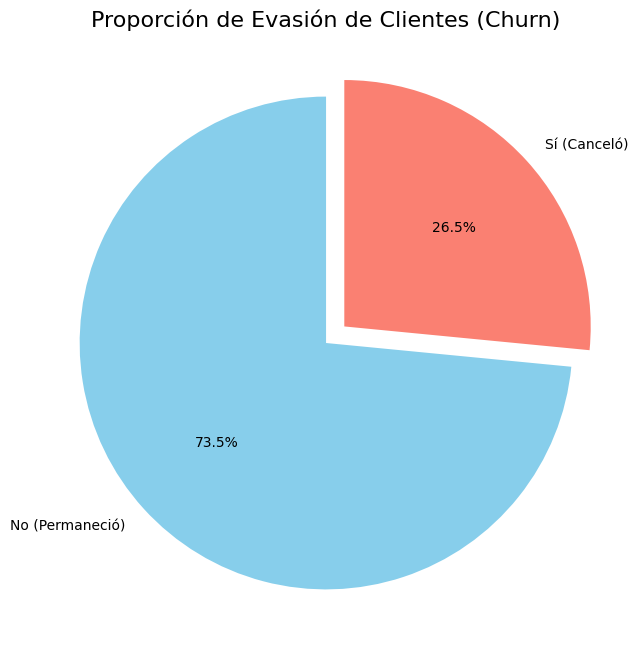

/tmp/ipython-input-794432230.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (Permaneció)', 'Sí (Canceló)'])


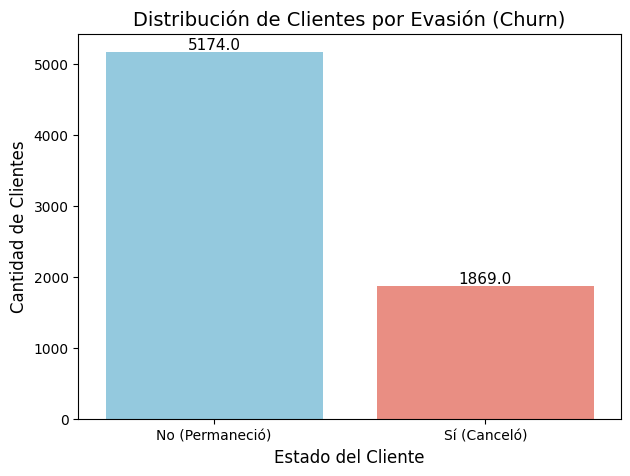

In [15]:
# 1. Importar bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preparación de los datos para el gráfico ---
# Contamos cuántos clientes hay en cada categoría de 'Churn' (0 para No, 1 para Yes)
churn_counts = df_corregido['Churn'].value_counts()
# Definimos etiquetas claras para el gráfico
churn_labels = ['No (Permaneció)', 'Sí (Canceló)']
# --- Creación del Gráfico de Pastel ---
plt.figure(figsize=(8, 8)) # Hacemos el gráfico un poco más grande
plt.pie(
    churn_counts,
    labels=churn_labels,
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon'],
    startangle=90,
    explode=(0, 0.1)
)
plt.title('Proporción de Evasión de Clientes (Churn)', fontsize=16)
plt.ylabel('') # Ocultamos el label del eje y que 'pie' pone por defecto
plt.show()

# --- Gráfico de Conteo ---
plt.figure(figsize=(7, 5))
ax = sns.countplot(
    x='Churn',
    data=df_corregido,
    palette=['skyblue', 'salmon'],
    hue='Churn',
    legend=False
)

# Cambiamos las etiquetas del eje x para que sean más descriptivas
ax.set_xticklabels(['No (Permaneció)', 'Sí (Canceló)'])
plt.title('Distribución de Clientes por Evasión (Churn)', fontsize=14)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

# Añadir el número exacto sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

9: Recuento de evasión por variables categóricas
Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

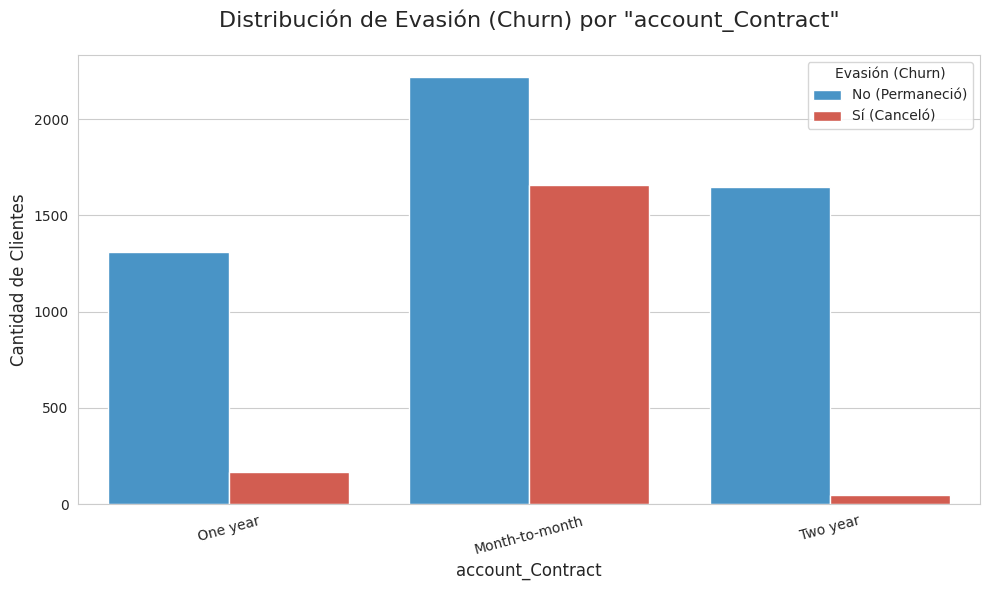

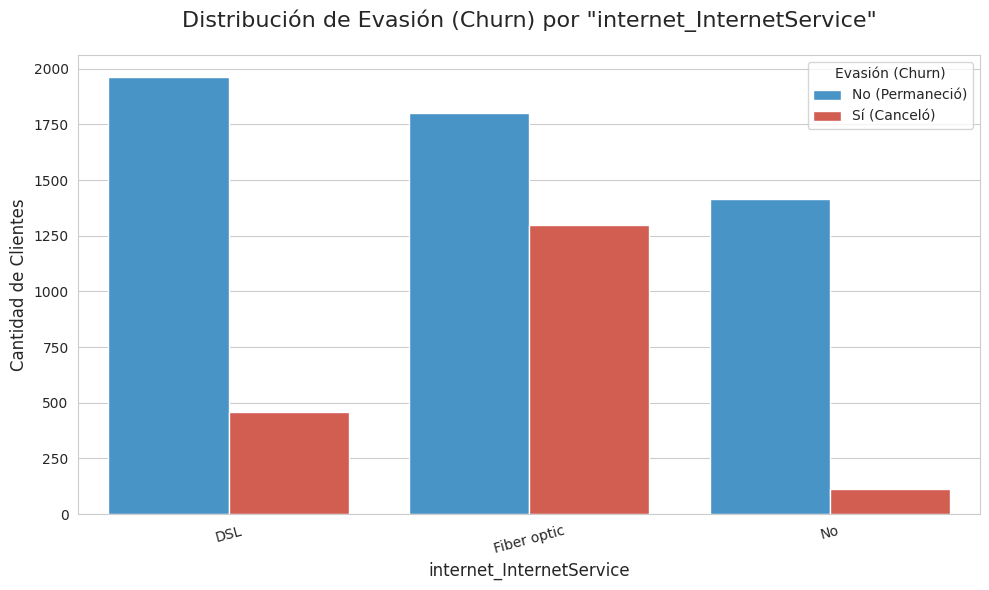

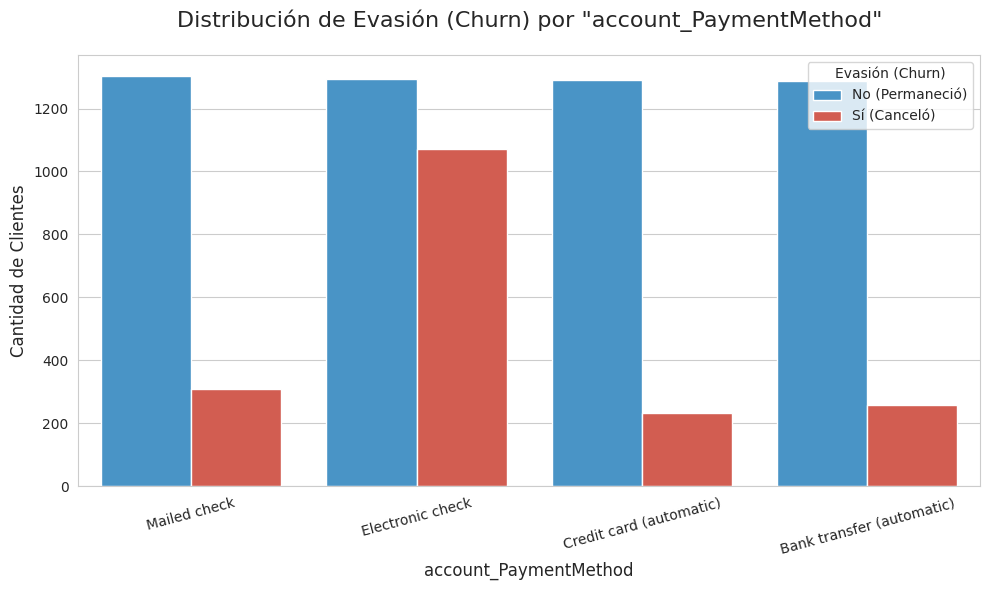

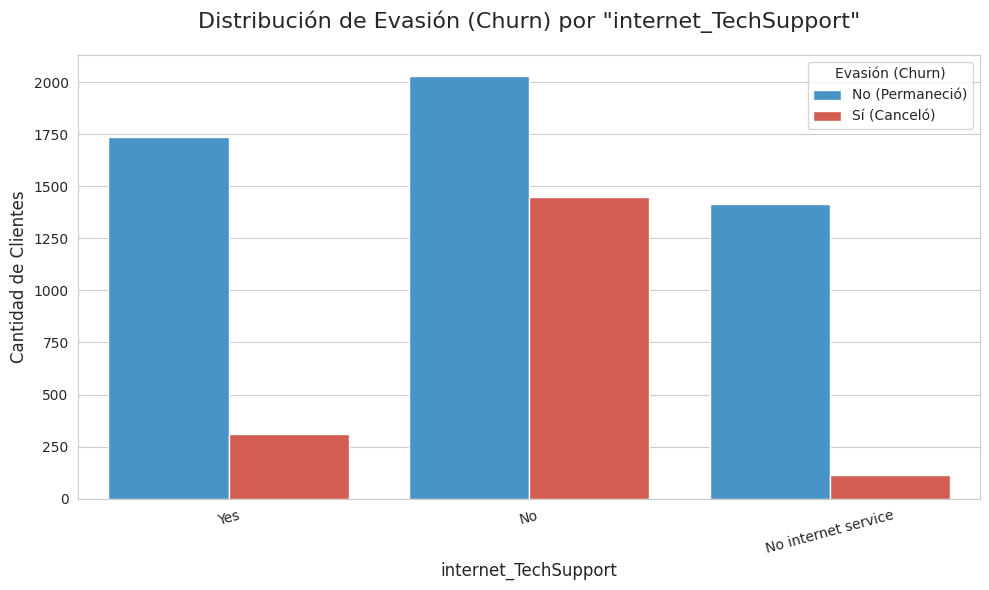

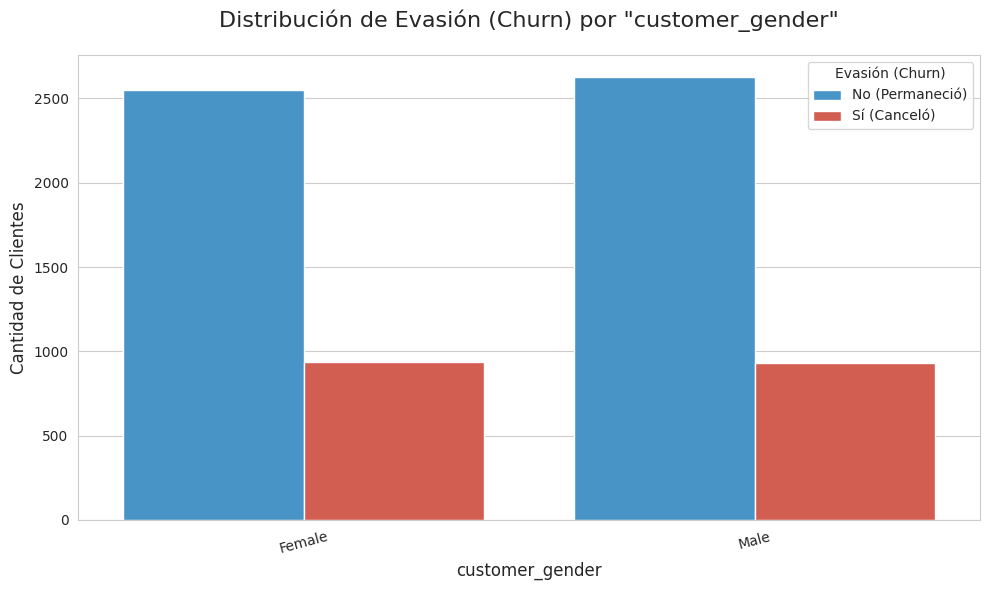

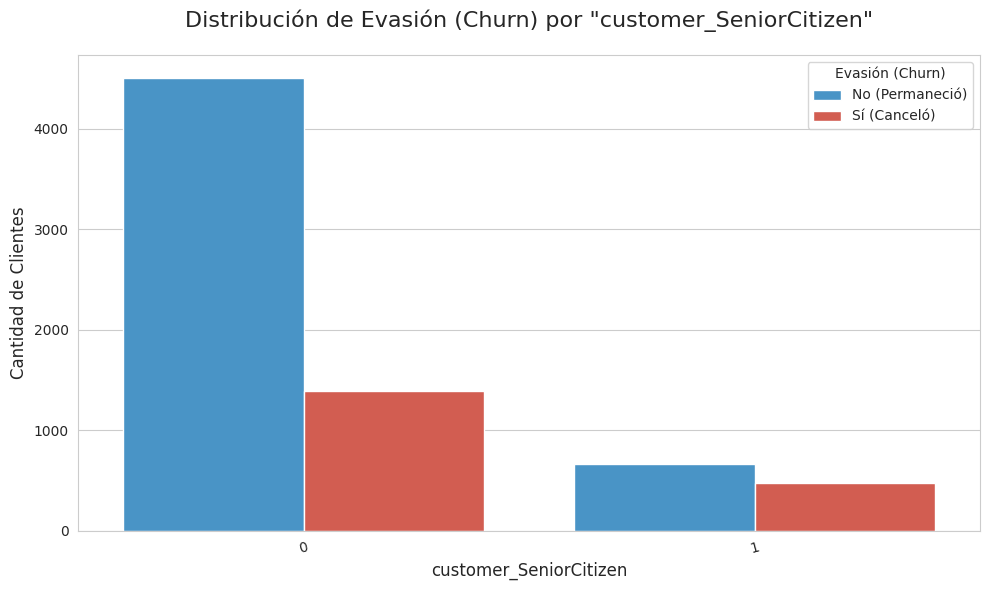

In [16]:
# 1. Importar bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Seleccionar las variables categóricas más relevantes para el análisis
columnas_categoricas = [
    'account_Contract',
    'internet_InternetService',
    'account_PaymentMethod',
    'internet_TechSupport',
    'customer_gender',
    'customer_SeniorCitizen'
]

# 3. Configurar el estilo de los gráficos
sns.set_style('whitegrid')

# 4. Crear un gráfico para cada variable categórica
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6)) # Creamos una figura nueva para cada gráfico
    ax = sns.countplot(
        x=columna,
        hue='Churn',
        data=df_corregido,
        palette=['#3498db', '#e74c3c'] # Azul para 'No', Rojo para 'Sí'
    )

    plt.title(f'Distribución de Evasión (Churn) por "{columna}"', fontsize=16, pad=20)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)
    plt.xticks(rotation=15) # Rotamos un poco las etiquetas si son largas

    # Modificar la leyenda para que sea más clara
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['No (Permaneció)', 'Sí (Canceló)'], title='Evasión (Churn)')

    plt.tight_layout()
    plt.show()

10: Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

/tmp/ipython-input-3638421203.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3638421203.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No (Permaneció)', 'Sí (Canceló)']) # Etiquetas más claras


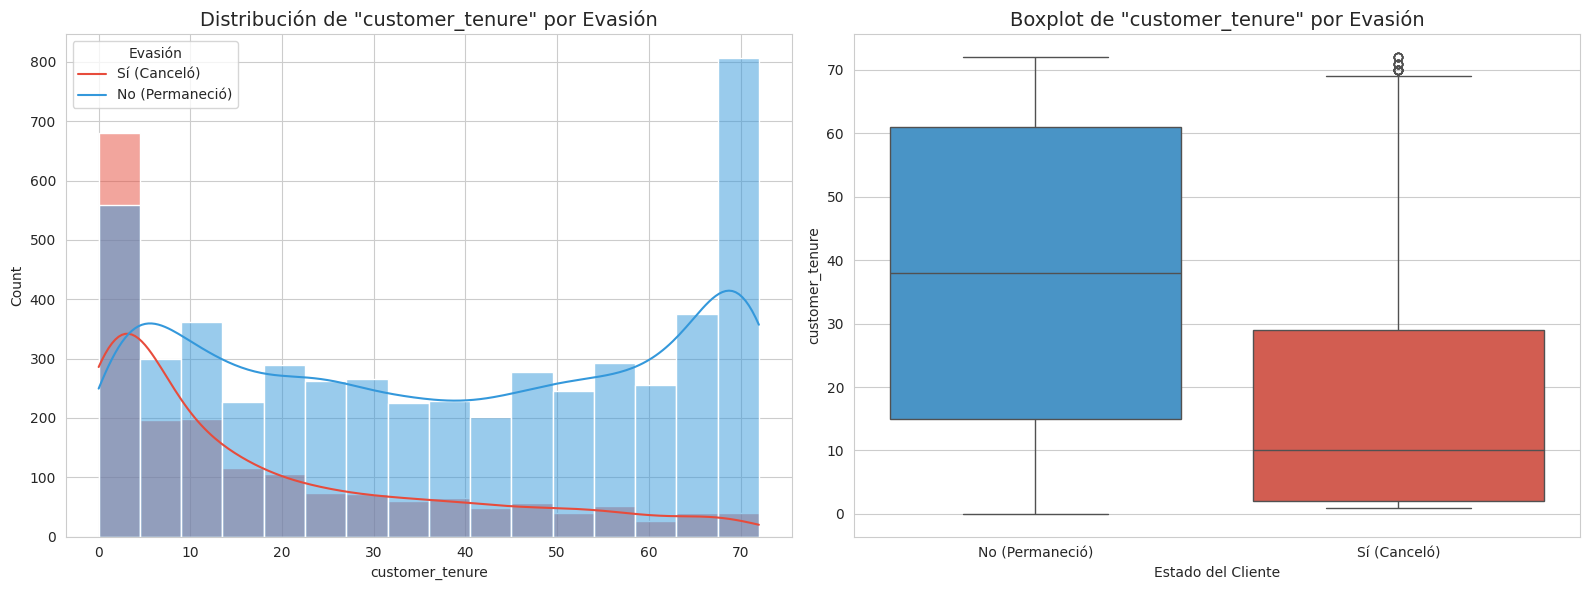

/tmp/ipython-input-3638421203.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3638421203.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No (Permaneció)', 'Sí (Canceló)']) # Etiquetas más claras


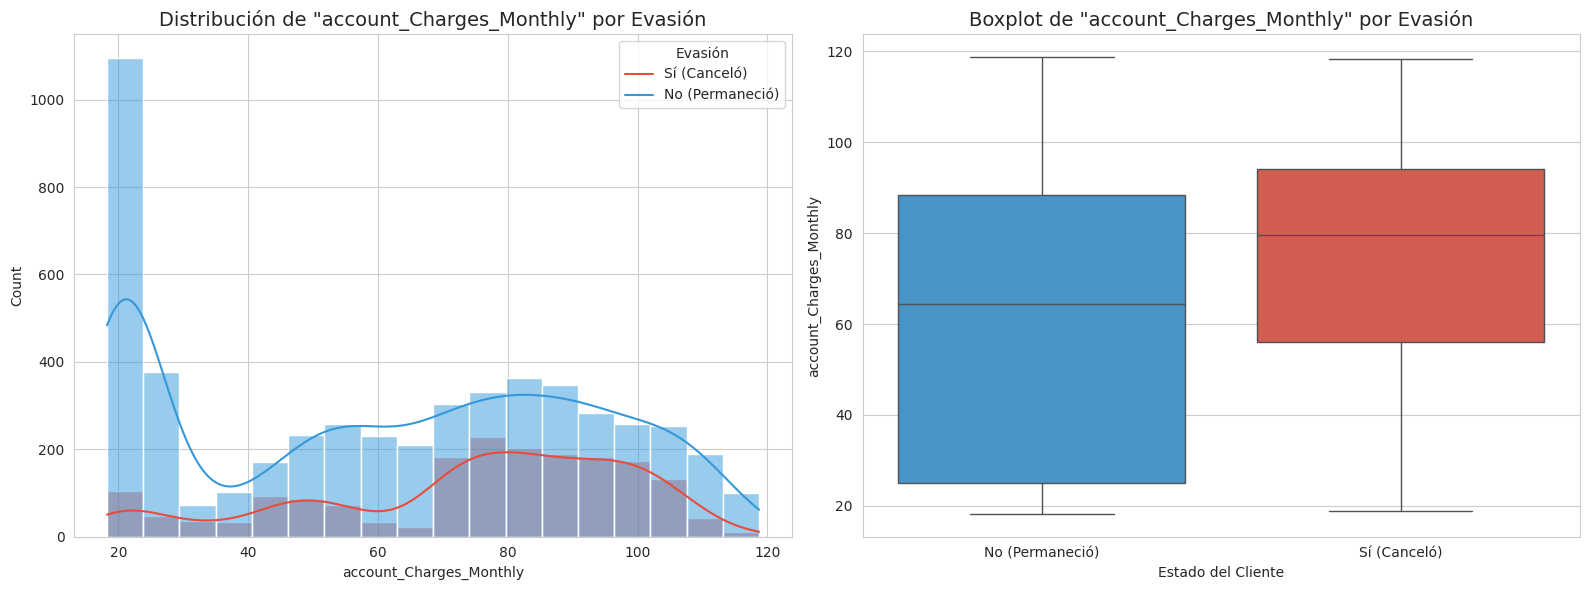

/tmp/ipython-input-3638421203.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3638421203.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No (Permaneció)', 'Sí (Canceló)']) # Etiquetas más claras


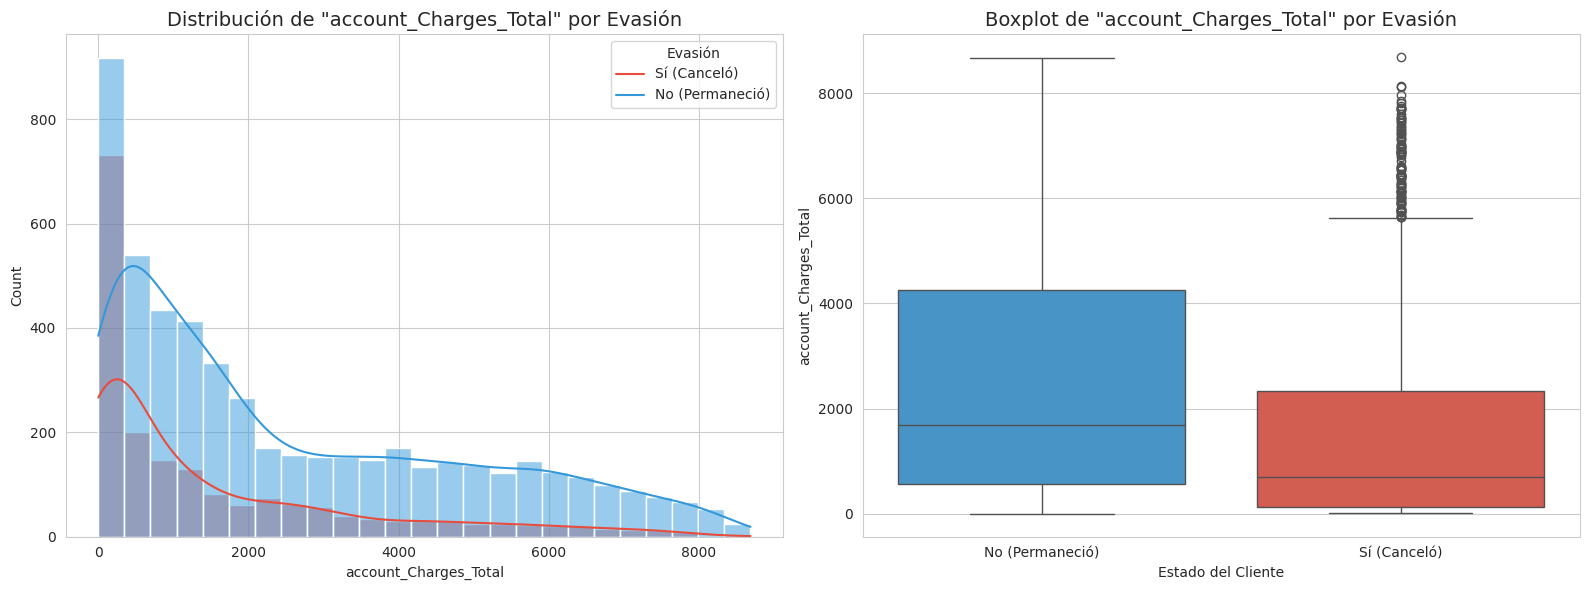

In [17]:
# 1. Importar bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Seleccionar las principales variables numéricas a analizar
columnas_numericas = [
    'customer_tenure',          # Antigüedad del cliente
    'account_Charges_Monthly',  # Cargo Mensual
    'account_Charges_Total'     # Cargo Total Acumulado
]

# 3. Configurar el estilo de los gráficos
sns.set_style('whitegrid')

# 4. Crear un par de gráficos (Histograma y Boxplot) para cada variable numérica
for columna in columnas_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    # --- Gráfico 1: Histograma con Curva de Densidad (KDE) ---
    sns.histplot(
        data=df_corregido,
        x=columna,
        hue='Churn',
        kde=True,  # Añade una línea suavizada para ver la forma de la distribución
        palette=['#3498db', '#e74c3c'], # Azul para 'No', Rojo para 'Sí'
        ax=axes[0] # Posiciona este gráfico en el primer subplot
    )
    axes[0].set_title(f'Distribución de "{columna}" por Evasión', fontsize=14)
    axes[0].legend(title='Evasión', labels=['Sí (Canceló)', 'No (Permaneció)'])

    # --- Gráfico 2: Diagrama de Caja (Boxplot) ---
    sns.boxplot(
        data=df_corregido,
        x='Churn',
        y=columna,
        palette=['#3498db', '#e74c3c'],
        ax=axes[1] # Posiciona este gráfico en el segundo subplot
    )
    axes[1].set_title(f'Boxplot de "{columna}" por Evasión', fontsize=14)
    axes[1].set_xticklabels(['No (Permaneció)', 'Sí (Canceló)']) # Etiquetas más claras
    axes[1].set_xlabel('Estado del Cliente')

    plt.tight_layout()
    plt.show()

#📄Informe final

## Informe final

## 🔹 1. Introducción
La empresa Telecom X enfrenta una **alta tasa de evasión de clientes (churn)**, lo que representa un desafío significativo para su rentabilidad y crecimiento. El objetivo de este análisis fue explorar los datos de los clientes para identificar los factores y patrones clave asociados con la cancelación del servicio.

## 🔹 2. Limpieza y Tratamiento de Datos
Para asegurar la calidad y fiabilidad del análisis, se realizó un proceso de preparación de datos, que incluyó los siguientes pasos:

*   **Extracción de Datos:** Se cargaron los datos directamente desde la API en formato JSON, convirtiéndolos a un DataFrame de Pandas para su manipulación.

*   **Corrección de Tipos de Datos:** La columna `account_Charges_Total` se convirtió a un formato numérico (`float64`) y los valores nulos resultantes se rellenaron con `0`.

*   **Manejo de Inconsistencias:** Se identificaron y eliminaron **224 registros** que no contenían información en la variable objetivo `Churn`.

*   **Estandarización de Columnas:** Las columnas con respuestas binarias (ej. 'Yes'/'No') fueron transformadas a un formato numérico (1/0).

*   **Ingeniería de Características:** Se creó la columna `Cuentas_Diarias` a partir del cargo mensual para ofrecer una perspectiva adicional.

El resultado fue un dataset limpio y coherente con **7,043 registros** listos para el análisis.

## 🔹 3. Análisis Exploratorio de Datos
El análisis reveló una tasa de evasión general del **26.5%**, confirmando que el problema es significativo. Los hallazgos más relevantes son:

### Hallazgo 1: El Tipo de Contrato es el Predictor Más Fuerte de Evasión (gráfico 1)
Los clientes con contratos **`Month-to-month` (mes a mes)** presentan una tasa de cancelación drásticamente superior en comparación con aquellos con contratos de uno o dos años.

### Hallazgo 2: Los Clientes Nuevos con Cargos Mensuales Altos son los Más Vulnerables (gráfico 2)
El análisis de variables numéricas mostró dos patrones claros:
*   **Antigüedad (`tenure`):** La mayoría de las cancelaciones ocurren durante los **primeros meses de servicio**.
*   **Cargo Mensual (`MonthlyCharges`):** Los clientes que cancelan tienden a tener, en promedio, **facturas mensuales más altas**.

### Hallazgo 3: Ciertos Servicios y Métodos de Pago están Asociados a un Mayor Riesgo (gráfico 3)
*   **Servicio de Internet:** Los clientes con **`Fibra Óptica`** muestran una tasa de churn más alta que los de `DSL`.
*   **Método de Pago:** Los clientes que utilizan **`Electronic check` (Cheque Electrónico)** cancelan en una proporción mucho mayor que aquellos con métodos automáticos.

## 🔹 4. Conclusiones e Insights
El análisis nos permite construir un **perfil claro del cliente con alto riesgo de evasión**:

*   Tiene un contrato **mes a mes**.
*   Es un cliente **relativamente nuevo** (baja antigüedad).
*   Paga una **factura mensual elevada**.
*   Utiliza **métodos de pago no automáticos**, como el cheque electrónico.
*   **No ha contratado servicios de valor añadido**, como Soporte Técnico.

Estos factores, especialmente combinados, crean un escenario de alto riesgo que la empresa puede ahora identificar proactivamente.

## 🔹 5. Recomendaciones Estratégicas

1.  **Fomentar Contratos a Largo Plazo:** Crear campañas de marketing y ofrecer incentivos (descuentos, servicios adicionales gratuitos) a los clientes con contratos mes a mes para que migren a planes anuales o de dos años.

2.  **Implementar un Programa de Onboarding:** Enfocar los esfuerzos de retención en los primeros 3-6 meses de servicio del cliente. Esto podría incluir llamadas de seguimiento, tutoriales personalizados y ofertas especiales para fortalecer la relación inicial.

3.  **Revisar la Oferta de Fibra Óptica:** Investigar por qué los clientes de este servicio se van más. Las posibles causas podrían ser problemas de estabilidad, una percepción de alto costo-beneficio o una competencia agresiva.

4.  **Incentivar Pagos Automáticos:** Ofrecer un pequeño descuento o beneficio a los clientes que cambien de cheque electrónico a métodos de pago automáticos, lo cual no solo reduce el churn sino que también disminuye la fricción administrativa.

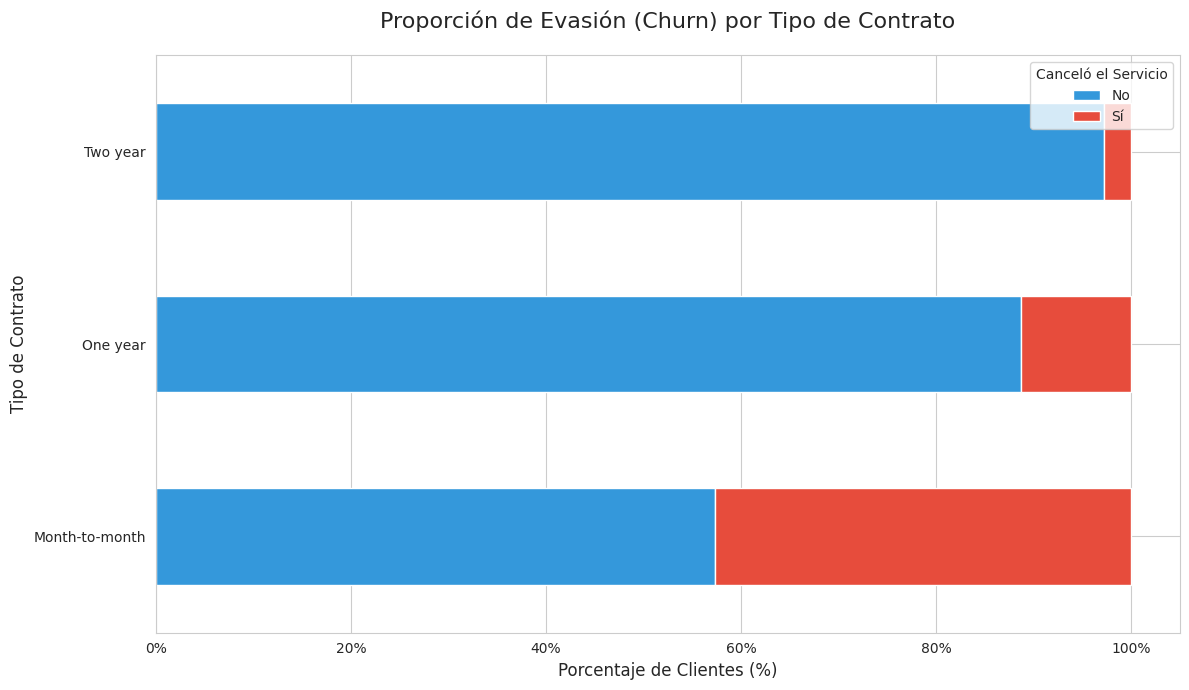

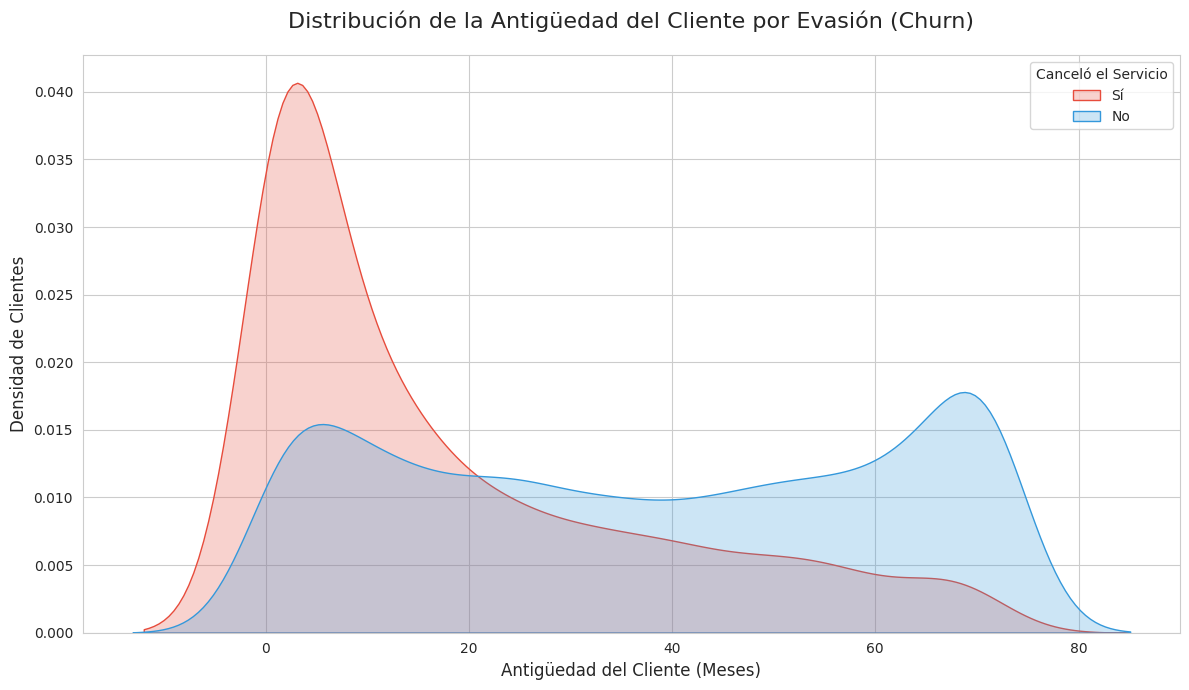

/tmp/ipython-input-2345096781.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(


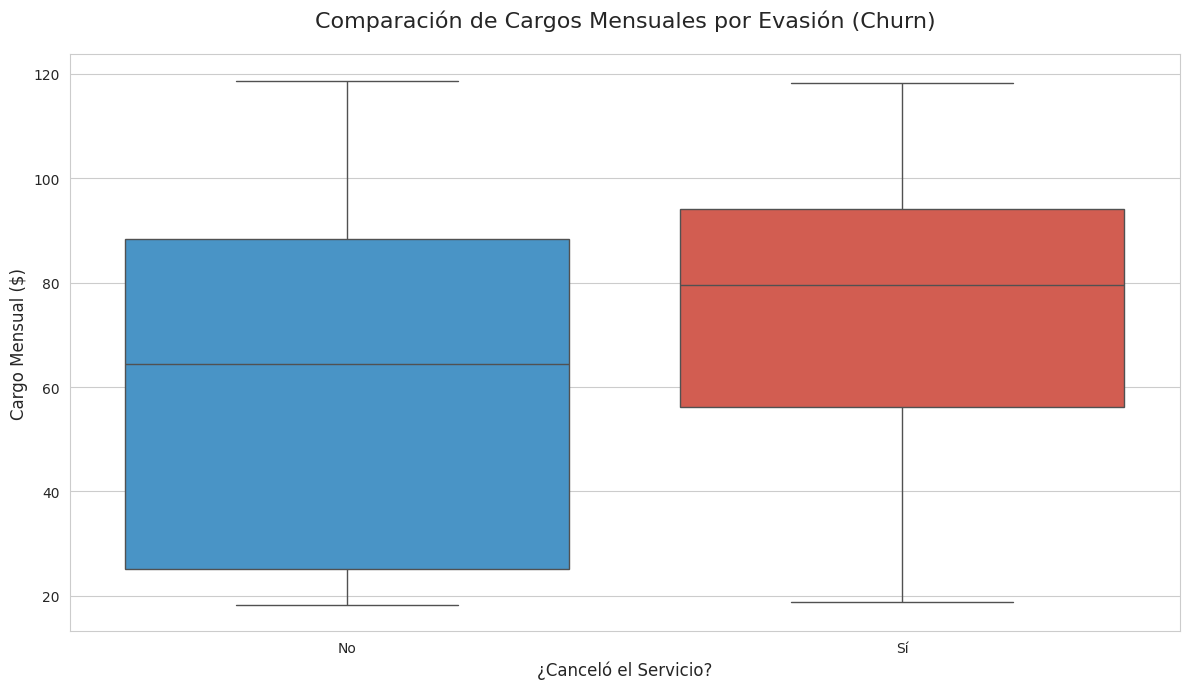

In [18]:
# --- 1. Importar las bibliotecas necesarias ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que 'df_corregido' es tu DataFrame ya limpio y procesado.
# Si no lo tienes cargado, necesitarías ejecutar los pasos de limpieza previos.

# --- 2. Configuración de estilo y colores para los gráficos ---
# Establecemos un estilo visual agradable y una paleta de colores consistente.
sns.set_style("whitegrid")
colores = {"No": "#3498db", "Sí": "#e74c3c"} # Azul para 'No', Rojo para 'Sí'

# Mapeamos los valores de Churn (0/1) a etiquetas de texto para los gráficos.
df_corregido['Churn_label'] = df_corregido['Churn'].map({0: 'No', 1: 'Sí'})


# --- VISUALIZACIÓN 1: "El Tipo de Contrato es el Predictor Más Fuerte" ---
# Usaremos un gráfico de barras apiladas al 100% para mostrar la PROPORCIÓN de churn.

# Preparamos los datos: contamos clientes por tipo de contrato y churn, y calculamos el porcentaje.
contract_churn = df_corregido.groupby(['account_Contract', 'Churn_label']).size().unstack()
contract_churn_percent = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100

# Creamos el gráfico
ax1 = contract_churn_percent.plot(
    kind='barh', # Gráfico de barras horizontales para mejor legibilidad
    stacked=True,
    color=[colores['No'], colores['Sí']],
    figsize=(12, 7),
    edgecolor="white"
)

# Añadimos títulos y etiquetas claras
ax1.set_title('Proporción de Evasión (Churn) por Tipo de Contrato', fontsize=16, pad=20)
ax1.set_xlabel('Porcentaje de Clientes (%)', fontsize=12)
ax1.set_ylabel('Tipo de Contrato', fontsize=12)
ax1.legend(title='Canceló el Servicio', loc='upper right')
ax1.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format)) # Formato de porcentaje en el eje X

plt.tight_layout()
plt.show()


# --- VISUALIZACIÓN 2: "Clientes Nuevos son los Más Vulnerables" (por Antigüedad) ---
plt.figure(figsize=(12, 7))
ax2 = sns.kdeplot(
    data=df_corregido,
    x='customer_tenure',
    hue='Churn_label',
    fill=True,
    palette=colores,
    common_norm=False # Normaliza cada curva de forma independiente
)

# Añadimos títulos y etiquetas
ax2.set_title('Distribución de la Antigüedad del Cliente por Evasión (Churn)', fontsize=16, pad=20)
ax2.set_xlabel('Antigüedad del Cliente (Meses)', fontsize=12)
ax2.set_ylabel('Densidad de Clientes', fontsize=12)
ax2.legend(title='Canceló el Servicio', labels=['Sí', 'No'])

plt.tight_layout()
plt.show()


# --- VISUALIZACIÓN 3: "Clientes con Cargos Mensuales Altos son Más Vulnerables" ---
plt.figure(figsize=(12, 7))
ax3 = sns.boxplot(
    data=df_corregido,
    x='Churn_label',
    y='account_Charges_Monthly',
    palette=colores,
    order=['No', 'Sí'] # Aseguramos el orden en el eje X
)

# Añadimos títulos y etiquetas
ax3.set_title('Comparación de Cargos Mensuales por Evasión (Churn)', fontsize=16, pad=20)
ax3.set_xlabel('¿Canceló el Servicio?', fontsize=12)
ax3.set_ylabel('Cargo Mensual ($)', fontsize=12)

plt.tight_layout()
plt.show()